### Notebook 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [2]:
df_ai = pd.read_csv('Dataset/ideb/ideb_escolas_anosiniciais2005_2017.csv',
                 encoding='latin-1',
                 na_values='-',
                 dtype={'Cod_Escola_Completo':'int', 'Ideb2005':'float', 'Ideb2007':'float', 'Ideb2009':'float', 'Ideb2011':'float',
                        'Ideb2013':'float', 'Ideb2015':'float', 'Ideb2017':'float'},
                 index_col='Cod_Escola_Completo')

df_af = pd.read_csv('Dataset/ideb/ideb_escolas_anosfinais2005_2017.csv',
                 encoding='latin-1',
                 na_values='-',
                 dtype={'Cod_Escola_Completo':'int', 'Ideb2005':'float', 'Ideb2007':'float', 'Ideb2009':'float', 'Ideb2011':'float',
                        'Ideb2013':'float', 'Ideb2015':'float', 'Ideb2017':'float'},
                 index_col='Cod_Escola_Completo')

cols2drop = ['Nome_Municipio', 'Nome_Escola', 'Cod_Municipio_Completo']
ideb_cols = ['Ideb2005', 'Ideb2007', 'Ideb2009', 'Ideb2011', 'Ideb2013', 'Ideb2015', 'Ideb2017']
proj_cols = ['ProjecaoIdeb2007', 'ProjecaoIdeb2009', 'ProjecaoIdeb2011', 'ProjecaoIdeb2013', 'ProjecaoIdeb2015', 'ProjecaoIdeb2017']

df_ai = df_ai.drop(cols2drop, axis=1)
df_ai = df_ai.dropna(axis=0, how='all', subset=ideb_cols)

df_af = df_af.drop(cols2drop, axis=1)
df_af = df_af.dropna(axis=0, how='all', subset=ideb_cols)

In [3]:
df_ai.head(3)

,Co_UF,Rede,TaxaAprovacao2005_1ao5ano,TaxaAprovacao2005_1ano,TaxaAprovacao2005_2ano,TaxaAprovacao2005_3ano,TaxaAprovacao2005_4ano,TaxaAprovacao2005_5ano,IndicadorRendimento_2005,TaxaAprovacao2007_1ao5ano,...,Ideb2015,Ideb2017,ProjecaoIdeb2007,ProjecaoIdeb2009,ProjecaoIdeb2011,ProjecaoIdeb2013,ProjecaoIdeb2015,ProjecaoIdeb2017,ProjecaoIdeb2019,ProjecaoIdeb2021
Cod_Escola_Completo,,,,,,,,,,,,,,,,,,,,,
11024666,RO,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,5.6,NaN,NaN,NaN,NaN,NaN,5.6,5.9,6.1
11024682,RO,Estadual,93.1,NaN,100.0,93.7,93.0,91.0,0.943084,92.0,...,5.8,6.9,4.2,4.6,5.0,5.3,5.5,5.8,6.1,6.3
11024828,RO,Municipal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.9,NaN,NaN,3.2,3.5,3.8,4.1,4.4,4.7


Vários valores que não tem valor estavam com um tracinho '-', decidi transformar em NaN para depois dropar colunas por nan.

Vamos primeiro verificar as colunas de IDEB de 2005 a 2017 e suas projeções. 

Todas as linhas de IDEB que estiverem com NaN vão ser eliminadas. Vou armazenar os códigos das escolas para eliminá-las da análise posteriormente.

In [4]:
ideb_df_ai = df_ai[['Rede', 'Ideb2005', 'Ideb2007', 'Ideb2009','Ideb2011', 'Ideb2013', 'Ideb2015', 'Ideb2017',
                 'ProjecaoIdeb2007', 'ProjecaoIdeb2009', 'ProjecaoIdeb2011', 'ProjecaoIdeb2013', 'ProjecaoIdeb2015', 'ProjecaoIdeb2017']]

In [5]:
ideb_df_ai.head(3)

,Rede,Ideb2005,Ideb2007,Ideb2009,Ideb2011,Ideb2013,Ideb2015,Ideb2017,ProjecaoIdeb2007,ProjecaoIdeb2009,ProjecaoIdeb2011,ProjecaoIdeb2013,ProjecaoIdeb2015,ProjecaoIdeb2017
Cod_Escola_Completo,,,,,,,,,,,,,,
11024666,Municipal,NaN,NaN,NaN,NaN,NaN,5.4,5.6,NaN,NaN,NaN,NaN,NaN,5.6
11024682,Estadual,4.2,4.3,4.5,4.8,5.4,5.8,6.9,4.2,4.6,5.0,5.3,5.5,5.8
11024828,Municipal,NaN,NaN,2.6,NaN,NaN,5.0,4.9,NaN,NaN,3.2,3.5,3.8,4.1


Verificando o boxplot do Ideb por ano de todas as redes.

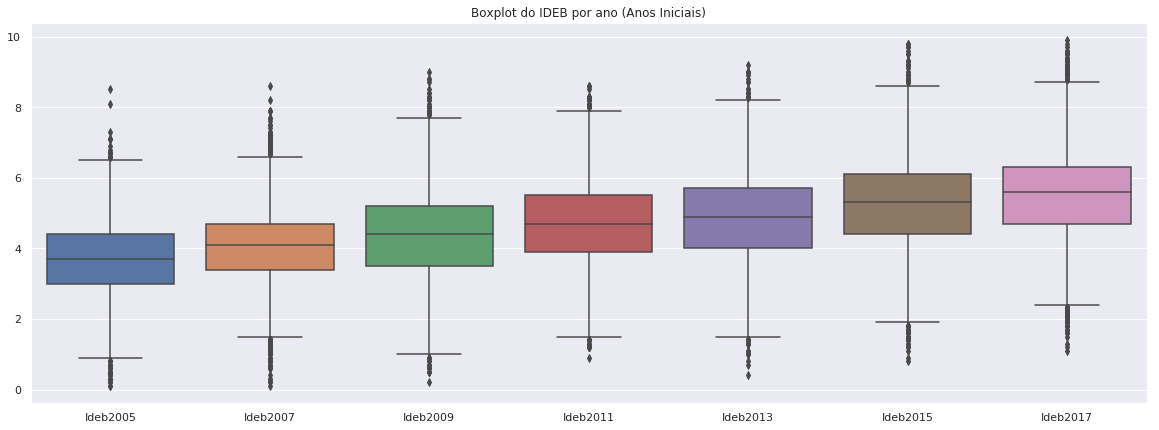

In [6]:
plt.figure(figsize=(20,7))
sns.boxplot(data=ideb_df_ai[ideb_cols])
plt.title('Boxplot do IDEB por ano (Anos Iniciais)')
plt.show()

Podemos utilizar o mesmo boxplot anterior, mas agora separando nas diferentes redes para compará-las entre si.

Verifica-se que a rede federal tem a maior nota média de Ideb, crescendo pouco conforme os anos.

É interessante notar que a rede estadual em 2005 possuía o pior Ideb e ultrapassou a rede municipal, e está próximo de atingir o Ideb das federais.

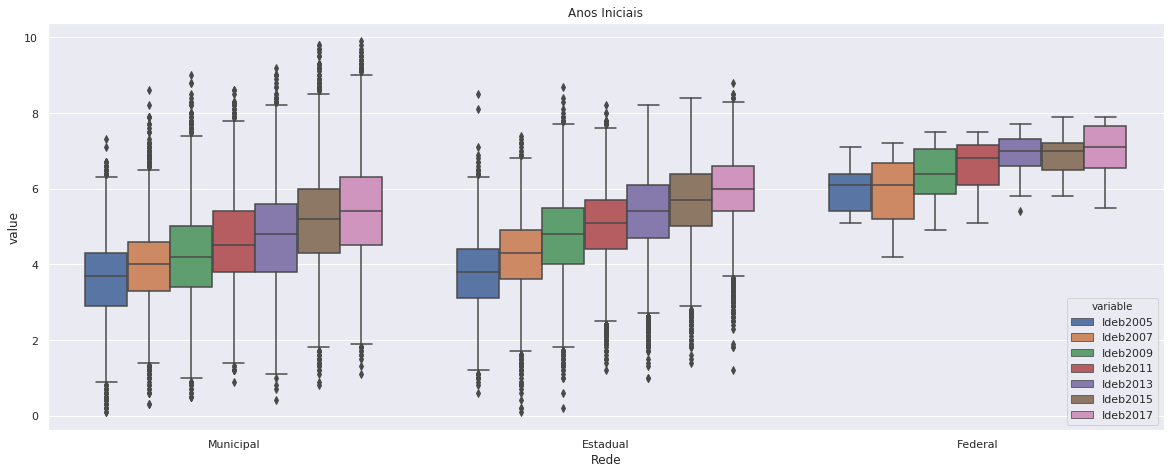

In [7]:
melt_df_ai = pd.melt(ideb_df_ai[['Rede', 'Ideb2005', 'Ideb2007', 'Ideb2009', 'Ideb2011', 'Ideb2013', 'Ideb2015', 'Ideb2017']], 
            id_vars='Rede', 
            value_vars=['Ideb2005', 'Ideb2007', 'Ideb2009', 'Ideb2011', 'Ideb2013', 'Ideb2015', 'Ideb2017'])

plt.figure(figsize=(20, 7.5))
sns.boxplot(x='Rede', y='value', hue='variable',data=melt_df_ai)
plt.title('Anos Iniciais')
plt.show()

Verificando o comportamento dos anos finais.

In [8]:
ideb_df_af = pd.concat([df_af[ideb_cols],df_af['Rede']], axis=1)

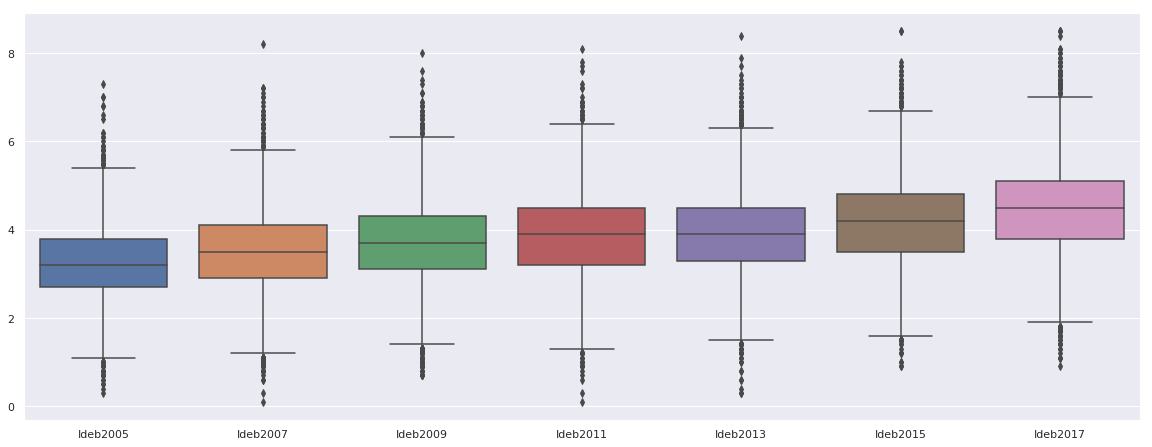

In [9]:
plt.figure(figsize=(20,7.5))
sns.boxplot(data=ideb_df_af[ideb_cols])
plt.show()

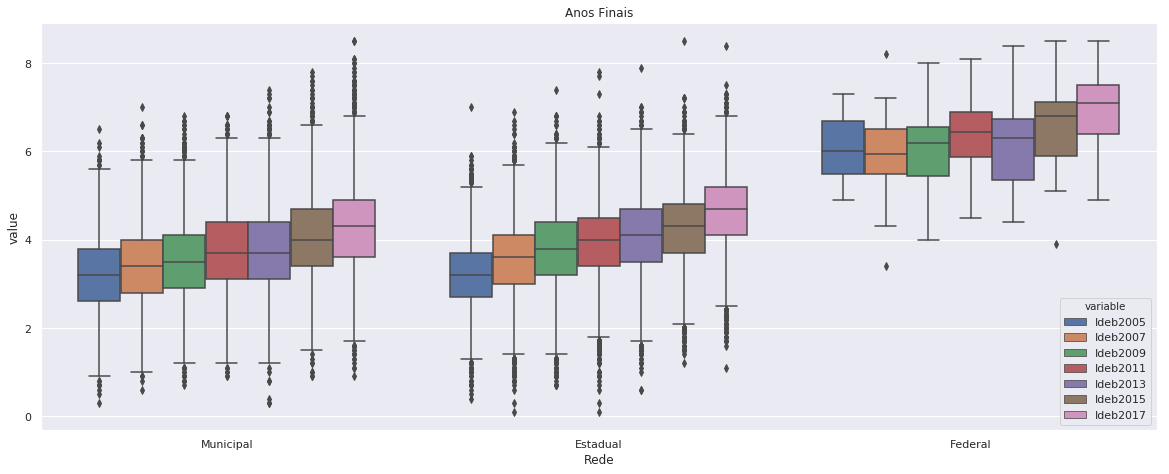

In [10]:
melt_df_af = pd.melt(ideb_df_af[['Rede', 'Ideb2005', 'Ideb2007', 'Ideb2009', 'Ideb2011', 'Ideb2013', 'Ideb2015', 'Ideb2017']], 
            id_vars='Rede', 
            value_vars=['Ideb2005', 'Ideb2007', 'Ideb2009', 'Ideb2011', 'Ideb2013', 'Ideb2015', 'Ideb2017'])

plt.figure(figsize=(20, 7.5))
sns.boxplot(x='Rede', y='value', hue='variable',data=melt_df_af)
plt.title('Anos Finais')
plt.show()

In [11]:
new_df_ai = ideb_df_ai[ideb_cols].copy()
new_df_ai = pd.concat([new_df_ai, df_ai['Co_UF']], axis=1)
new_df_ai.columns = [col + '_ai' for col in new_df_ai.columns]
new_df_ai = new_df_ai.reset_index()

new_df_af = ideb_df_af[ideb_cols].copy()
new_df_af = pd.concat([new_df_af, df_af['Co_UF']], axis=1)
new_df_af.columns = [col + '_af' for col in new_df_af.columns]
new_df_af = new_df_af.reset_index()

ideb_ef = pd.merge(new_df_ai, new_df_af, on='Cod_Escola_Completo')
ideb_ef.columns = ideb_ef.columns
ideb_ef = ideb_ef.set_index(keys='Cod_Escola_Completo')

Agora, verificando qual a diferença de Ideb entre 2005 e 2017 para os anos finais e iniciais.

In [12]:
ideb_ef['dif_af'] = ideb_ef.apply(lambda row : row['Ideb2017_af'] - row['Ideb2005_af'], axis=1)
ideb_ef['dif_ai'] = ideb_ef.apply(lambda row : row['Ideb2017_ai'] - row['Ideb2005_ai'], axis=1)
ideb_ef['UF'] = ideb_ef.apply(lambda row : row['Co_UF_ai'], axis=1)
ideb_ef.drop(['Co_UF_ai', 'Co_UF_af'], axis=1, inplace=True)

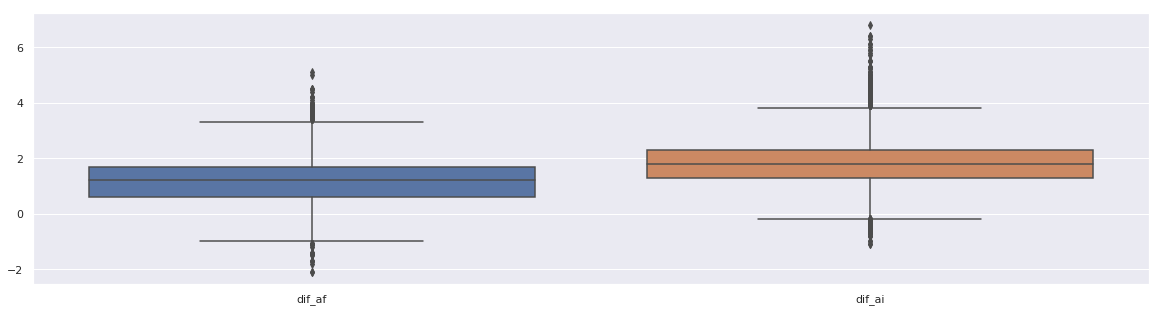

In [13]:
plt.figure(figsize=(20,5))
sns.boxplot(data=ideb_ef[['dif_af', 'dif_ai']])
plt.show()

Verificando quais os Estados que mais melhoraram entre os períodos de 2005 e 2017 nos anos finais e iniciais.

O Boxplot abaixo está organizado em ordem decrescente da mediana, levando em consideração os anos finais e iniciais juntos.

Organizado pela maior mediana.


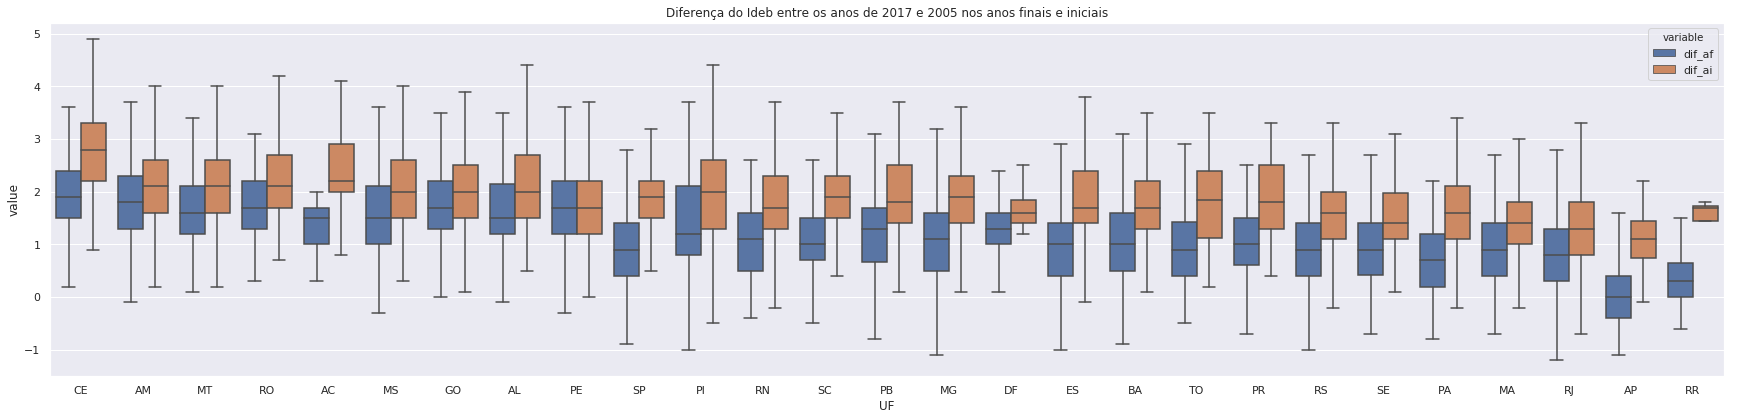

In [14]:
print('Organizado pela maior mediana.')

diffs = pd.melt(ideb_ef, id_vars='UF', value_vars=['dif_af', 'dif_ai'])
aggregation = diffs.groupby('UF').agg(['median', 'mean', 'std'])
median_order = aggregation['value']['median'].sort_values(ascending=False).index.tolist()

plt.figure(figsize=(30,6.5))
plt.title('Diferença do Ideb entre os anos de 2017 e 2005 nos anos finais e iniciais')
sns.boxplot(x='UF', y='value', hue='variable', data=diffs, order=median_order, showfliers=False)
plt.show()

Organizado pela maior mediana.


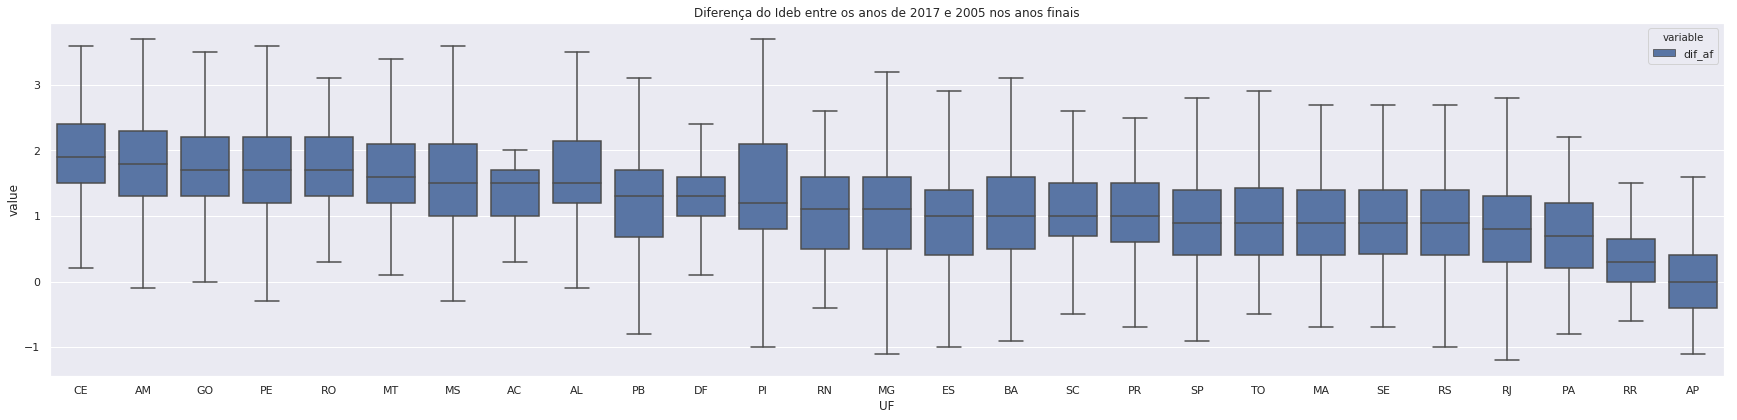

In [15]:
print('Organizado pela maior mediana.')

diffs = pd.melt(ideb_ef, id_vars='UF', value_vars=['dif_af'])
aggregation = diffs.groupby('UF').agg(['median', 'mean', 'std'])
median_order = aggregation['value']['median'].sort_values(ascending=False).index.tolist()

plt.figure(figsize=(30,6.5))
plt.title('Diferença do Ideb entre os anos de 2017 e 2005 nos anos finais')
sns.boxplot(x='UF', y='value', hue='variable', data=diffs, order=median_order, showfliers=False)
plt.show()

Organizado pela maior mediana.


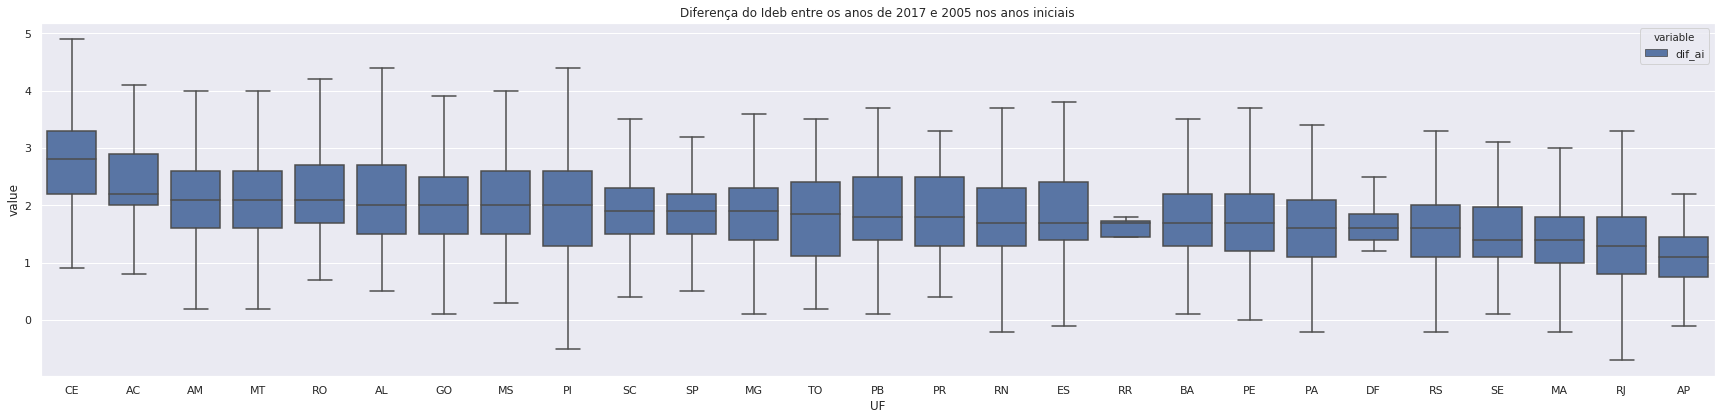

In [16]:
print('Organizado pela maior mediana.')

diffs = pd.melt(ideb_ef, id_vars='UF', value_vars=['dif_ai'])
aggregation = diffs.groupby('UF').agg(['median', 'mean', 'std'])
median_order = aggregation['value']['median'].sort_values(ascending=False).index.tolist()

plt.figure(figsize=(30,6.5))
plt.title('Diferença do Ideb entre os anos de 2017 e 2005 nos anos iniciais')
sns.boxplot(x='UF', y='value', hue='variable', data=diffs, order=median_order, showfliers=False)
plt.show()

### Verificando se há correlação com o número de equipamentos na escola

Não há dados sobre equipamentos nos anteriores a 2013, por isso, vou usar apenas os dados de 2013 em diante.

In [17]:
# Colunas que vou usar para representar os equipamentos das escolas

not2drop = ['num_computador', 'num_equip_copiadora', 'num_equip_foto', 'num_equip_impressora',
            'num_equip_multimidia', 'num_equip_parabolica', 'num_equip_retroprojetor', 'num_equip_som',
            'num_equip_tv', 'num_comp_aluno', 'cod_escola_inep']

In [18]:
# Agregando os equipamentos pela mediana
escolas_list = []
for yr in [2013, 2014, 2015, 2016, 2017]: 
    escola_temp = pd.read_csv('Dataset/escolas/escolas20130101.csv', usecols=not2drop)
    escolas_list.append(escola_temp)
    
del escola_temp

df_escolas = pd.concat(escolas_list, axis=0).groupby('cod_escola_inep').agg('median')
df_escolas = df_escolas.reset_index().rename(columns={'cod_escola_inep':'Cod_Escola_Completo'})

del escolas_list

ideb_ef = ideb_ef.copy().drop(['Ideb2005_ai', 'Ideb2007_ai', 'Ideb2009_ai', 'Ideb2011_ai',
              'Ideb2005_af', 'Ideb2007_af', 'Ideb2009_af', 'Ideb2011_af', 'dif_af', 'dif_ai'], axis=1)

merge_df = pd.merge(df_escolas, ideb_ef.reset_index(), on='Cod_Escola_Completo')
merge_df.index = merge_df['Cod_Escola_Completo']
merge_df.drop(['Cod_Escola_Completo'], axis=1, inplace=True)

### Pegando os índices GINI

In [19]:
gini_2017 = pd.read_csv('GINI/GINI_2015_csv.csv',)#dtypes={'Estado':'str', 'GINI':'float'})
gini_2017['GINI'] = gini_2017.apply(lambda row : int(row['GINI'].split(',')[1])/1000, axis=1)
estado_mapping = {"Acre":"AC", "Alagoas":"AL", "Amapá":"AP", "Amazonas":"AM", "Bahia":"BA", "Ceará":"CE", "Distrito Federal":"DF", "Espírito Santo":"ES", 
                  "Goiás":"GO","Maranhão":"MA", "Mato Grosso":"MT", "Mato Grosso do Sul":"MS", "Minas Gerais":"MG", "Pará":"PA", 
                  "Paraíba":"PB", "Paraná":"PR", "Pernambuco":"PE", "Piauí":"PI", "Rio de Janeiro":"RJ", "Rio Grande do Norte":"RN", 
                  "Rio Grande do Sul":"RS","Rondônia":"RO","Roraima":"RR","Santa Catarina":"SC","São Paulo":"SP","Sergipe":"SE","Tocantins":"TO"}
gini_2017['Estado'] = gini_2017.apply(lambda row : estado_mapping[row['Estado']], axis=1)
gini_2017 = gini_2017.rename(columns={'Estado':'UF'})

In [20]:
gini_ideb = pd.merge(ideb_ef.groupby('UF').median().reset_index(), gini_2017, on='UF')

Um dos meus objetivos é analisar se existe alguma unidade federativa com alto índice GINI e alto índice no Ideb.

Caso essa unidade federativa exista, ela seŕa um outlier na educação brasileira. 

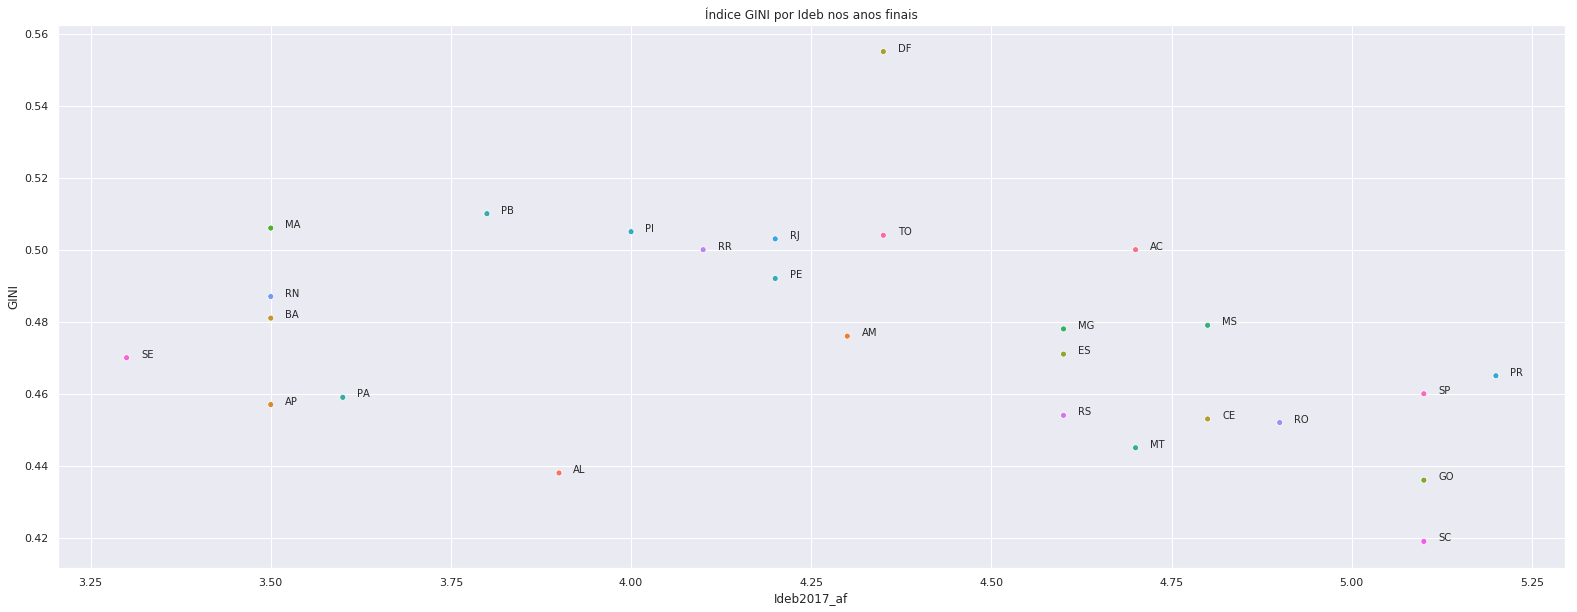

In [21]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))


plt.figure(figsize=(27,10))
plt.title('Índice GINI por Ideb nos anos finais')
sns.scatterplot(x='Ideb2017_af', y='GINI', hue='UF', data=gini_ideb, legend=False)
label_point(gini_ideb.Ideb2017_af, gini_ideb.GINI, gini_ideb.UF, plt.gca())

plt.show()

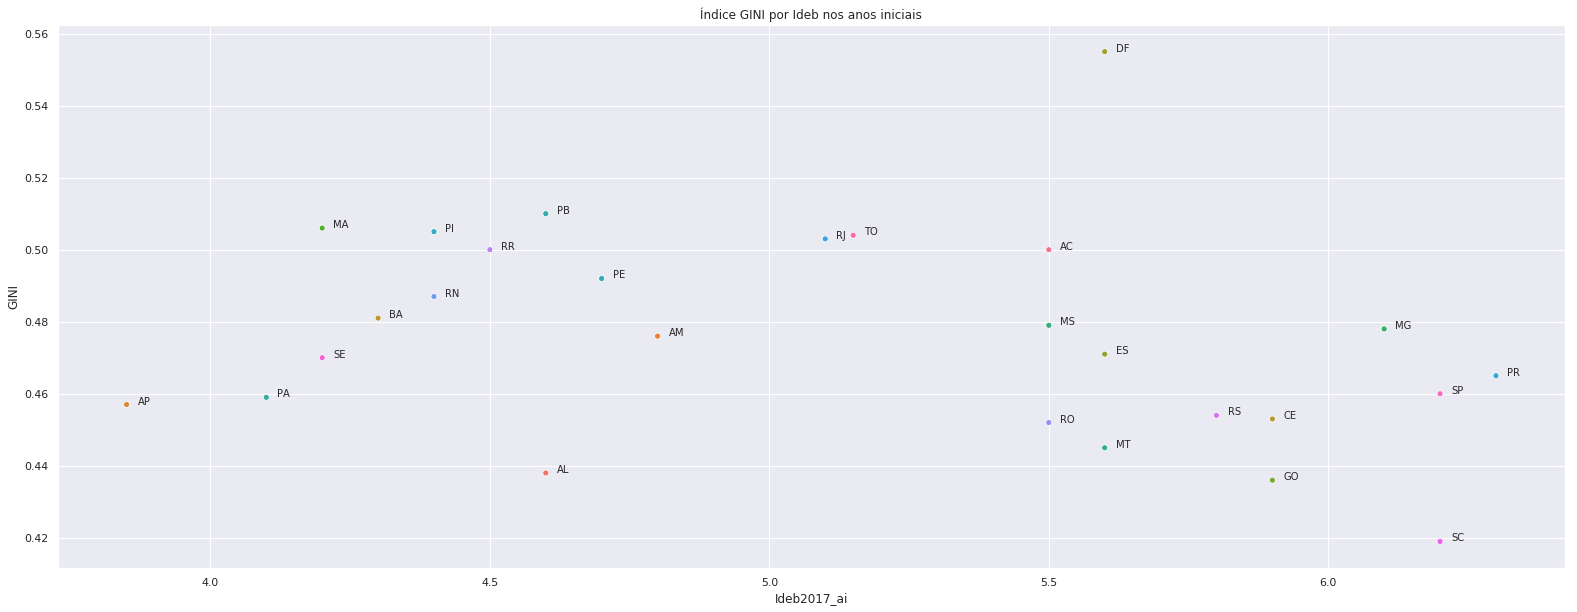

In [22]:
plt.figure(figsize=(27,10))
plt.title('Índice GINI por Ideb nos anos iniciais')
sns.scatterplot(x='Ideb2017_ai', y='GINI', hue='UF', data=gini_ideb, legend=False)
label_point(gini_ideb.Ideb2017_ai, gini_ideb.GINI, gini_ideb.UF, plt.gca())

plt.show()

Nota-se que o estado do Acre é um estado pobre, com alto índice GINI e com crescentes notas no IDEB.

O Acre encontra-se apenas atrás do Ceará nas diferenças de Ideb entre os anos de 2017 e 2005 nos anos iniciais, implicando que ambos estados estão melhorando a qualidade de sua educação.

Para maior granularidade, iremos pegar os estados do Acre e do Ceará como exemplos de 

In [23]:
df_acre = ideb_ef[ideb_ef['UF'] == 'CE'].drop(['UF'], axis=1)
df_acre.head(3)

,Ideb2013_ai,Ideb2015_ai,Ideb2017_ai,Ideb2013_af,Ideb2015_af,Ideb2017_af
Cod_Escola_Completo,,,,,,
23168862,6.9,6.8,6.2,NaN,4.4,5.1
23168951,NaN,NaN,6.8,NaN,NaN,4.3
23169001,7.2,5.1,5.5,4.4,3.9,4.2


Vamos verificar as distribuições dos Idebs para ver se não há algo fora da normalidade interferindo no resultado. 

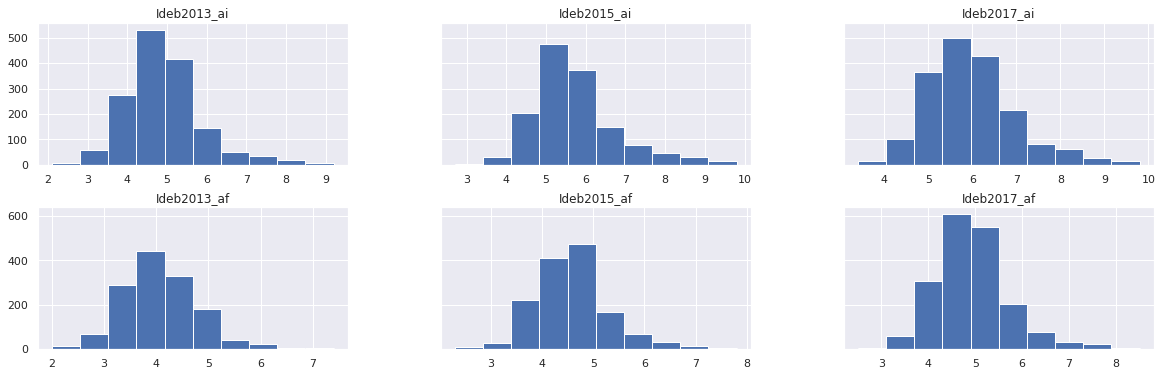

In [24]:
fig, ax = plt.subplots(2, 3, sharey='row', figsize=(20,6))
plt.figure(figsize=(20,5))
for j in range(3):
    df_acre.hist(column=df_acre.columns[j], ax=ax[0,j])
    df_acre.hist(column=df_acre.columns[j+3], ax=ax[1,j])
plt.show()

In [25]:
df_acre_2 = pd.merge(df_acre.reset_index(), df_escolas, on='Cod_Escola_Completo')
df_acre_2.index = df_acre_2['Cod_Escola_Completo']
df_acre_2 = df_acre_2.drop(['Cod_Escola_Completo'], axis=1)
# df_acre_2 = df_acre_2.drop(12014605, axis=0)

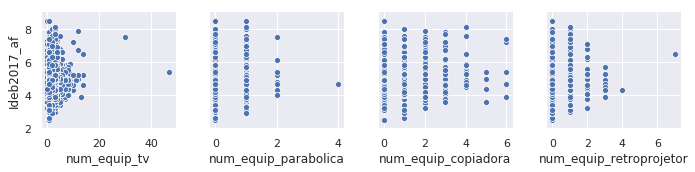

In [26]:
sns.pairplot(data=df_acre_2, y_vars=['Ideb2017_af'], x_vars=df_acre_2.columns[6:10])
plt.show()

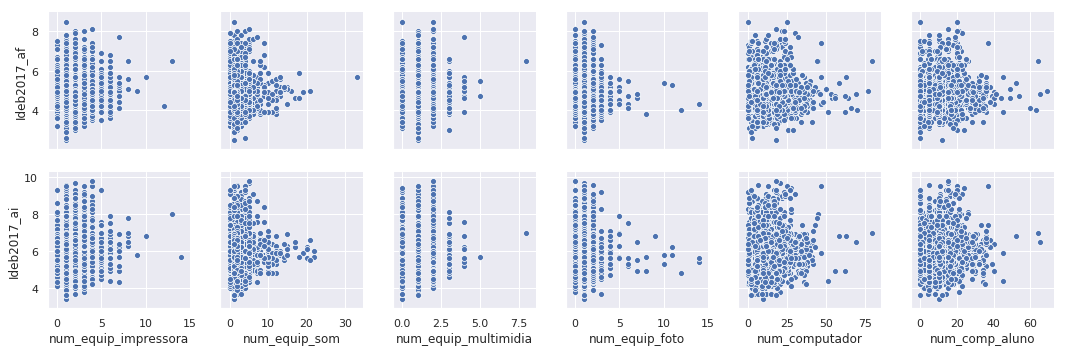

In [27]:
sns.pairplot(data=df_acre_2, y_vars=['Ideb2017_af', 'Ideb2017_ai'], x_vars=df_acre_2.columns[10:])
plt.show()

Olhando pelo scatter, dá-se a entender que nos anos iniciais o número de equipamentos sonoros tem relação com o Ideb, assim como o número de computador por aluno. 

Contudo, essas informações não são verdadeiras para os anos finais do ensino fundamental.

Vamos fazer essa mesma verificação considerando também os outros estados.

In [28]:
scatter_df = pd.merge(ideb_ef.reset_index(), df_escolas, on='Cod_Escola_Completo')

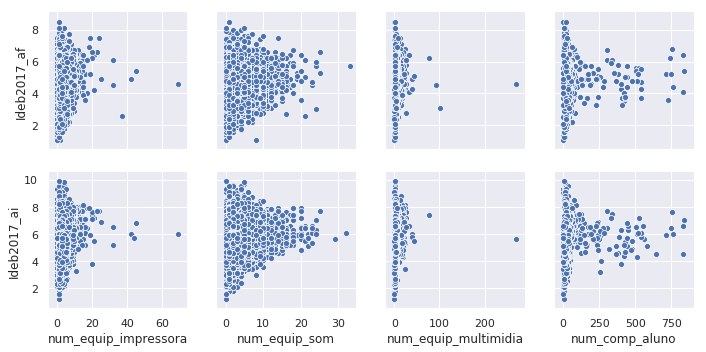

In [29]:
sns.pairplot(data=scatter_df, y_vars=['Ideb2017_af', 'Ideb2017_ai'], x_vars=['num_equip_impressora', 'num_equip_som', 'num_equip_multimidia', 'num_comp_aluno'])
plt.show()

Infelizmente, esses dados não nos dizem muitas coisas se não soubermos qual a quantidade de alunos das escolas.

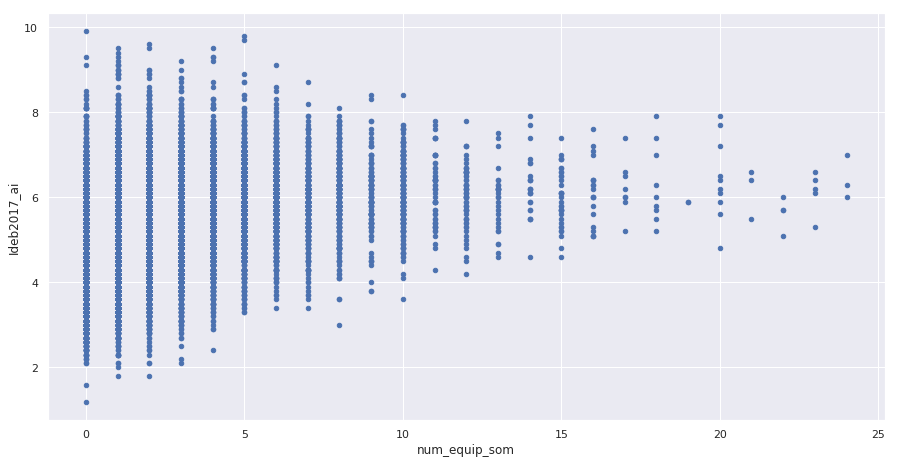

In [30]:
scatter_df[scatter_df['num_equip_som'] < 25].plot.scatter(x='num_equip_som', y='Ideb2017_ai', figsize=(15,7.5))
plt.show()

Temos aqui uma sugestão de que equipamentos, como equipamentos sonoros e equipamentos multimídia, são importantes para um bom Ideb, pois talvez representem uma melhor infraestrutura escolar. 

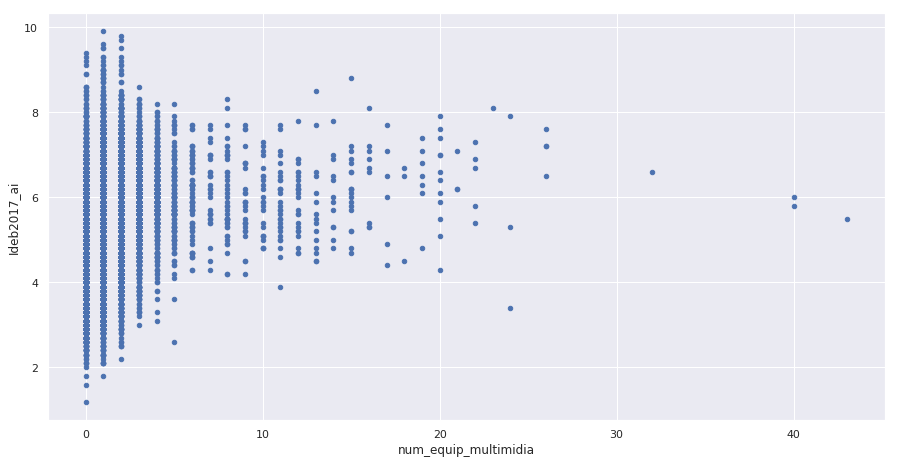

In [31]:
scatter_df[scatter_df['num_equip_multimidia'] < 50].plot.scatter(x='num_equip_multimidia', y='Ideb2017_ai', figsize=(15,7.5))
plt.show()

___

Agora, vou usar uma árvore de decisões para classificar a importância das features, para isso, criarei a seguinte heurística:

1) Primeiro irei separar os dados em 6 conjuntos, os quais representam os Idebs nos anos de 2013,2015 e 2017 para anos finais e iniciais.

2) Irei criar uma coluna chamada apenas 'ideb' que terá um sinal binário de 0 ou 1.

3) O sinal será 1 caso a nota do Ideb da escola for maior que 10% da média de todas as outras escolas.

4) Irei juntas esses 6 conjuntos em um novo dataframe para termos mais dados para treinar, permitindo mais folds para nosso cross-validation.

In [32]:
not_ideb_cols = df_acre_2.columns[6:].tolist()

df_set_1 = df_acre_2[['Ideb2013_ai'] + not_ideb_cols].dropna(axis=0, how='any')
df_set_1['Ideb2013_ai'] = df_set_1.apply(lambda row : 1 if row['Ideb2013_ai'] >= 1.1*df_set_1['Ideb2013_ai'].mean() else 0, axis=1)
df_set_1 = df_set_1.rename(columns={'Ideb2013_ai':'ideb'})

df_set_2 = df_acre_2[['Ideb2015_ai'] + not_ideb_cols].dropna(axis=0, how='any')
df_set_2['Ideb2015_ai'] = df_set_2.apply(lambda row : 1 if row['Ideb2015_ai'] >= 1.1*df_set_2['Ideb2015_ai'].mean() else 0, axis=1)
df_set_2 = df_set_2.rename(columns={'Ideb2015_ai':'ideb'})

df_set_3 = df_acre_2[['Ideb2017_ai'] + not_ideb_cols].dropna(axis=0, how='any')
df_set_3['Ideb2017_ai'] = df_set_3.apply(lambda row : 1 if row['Ideb2017_ai'] >= 1.1*df_set_3['Ideb2017_ai'].mean() else 0, axis=1)
df_set_3 = df_set_3.rename(columns={'Ideb2017_ai':'ideb'})

df_set_4 = df_acre_2[['Ideb2013_af'] + not_ideb_cols].dropna(axis=0, how='any')
df_set_4['Ideb2013_af'] = df_set_4.apply(lambda row : 1 if row['Ideb2013_af'] >= 1.1*df_set_4['Ideb2013_af'].mean() else 0, axis=1)
df_set_4 = df_set_4.rename(columns={'Ideb2013_af':'ideb'})

df_set_5 = df_acre_2[['Ideb2015_af'] + not_ideb_cols].dropna(axis=0, how='any')
df_set_5['Ideb2015_af'] = df_set_5.apply(lambda row : 1 if row['Ideb2015_af'] >= 1.1*df_set_5['Ideb2015_af'].mean() else 0, axis=1)
df_set_5 = df_set_5.rename(columns={'Ideb2015_af':'ideb'})

df_set_6 = df_acre_2[['Ideb2017_af'] + not_ideb_cols].dropna(axis=0, how='any')
df_set_6['Ideb2017_af'] = df_set_6.apply(lambda row : 1 if row['Ideb2017_af'] >= 1.1*df_set_6['Ideb2017_af'].mean() else 0, axis=1)
df_set_6 = df_set_6.rename(columns={'Ideb2017_af':'ideb'})

ideb_classifier = pd.concat([df_set_1, df_set_2, df_set_3, df_set_4, df_set_5, df_set_6], axis=0)
ideb_classifier.head(3)

,ideb,num_equip_tv,num_equip_parabolica,num_equip_copiadora,num_equip_retroprojetor,num_equip_impressora,num_equip_som,num_equip_multimidia,num_equip_foto,num_computador,num_comp_aluno
Cod_Escola_Completo,,,,,,,,,,,
23168862,1,5,1,1,0,6,6,1,2,25,18
23169001,1,1,1,1,0,3,2,1,2,23,20
23051710,0,3,0,2,0,0,5,2,1,21,17


Construindo agora uma árvore de decisão muito básica apenas para determinarmos as features importantes.

Acurácia média: 0.830 (Desvio Padrão: 0.006)

E as features de maior importância são


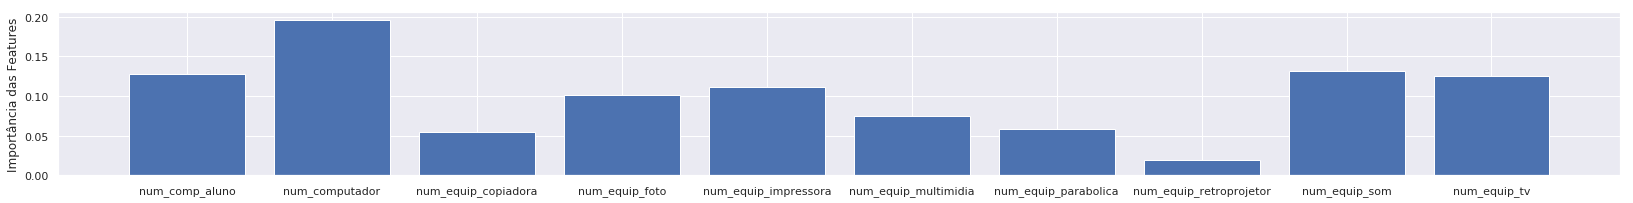

In [34]:
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X = ideb_classifier[ideb_classifier.columns[1:]].as_matrix()
y = ideb_classifier[ideb_classifier.columns[0]].as_matrix()

dt_old = DecisionTreeClassifier()
dt_old.fit(X, y)
scores = cross_val_score(dt_old, X, y, cv=3)

print("Acurácia média: {:.3f} (Desvio Padrão: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

print('E as features de maior importância são')
position = 0
import_features = []
for feature_val in np.round(dt_old.feature_importances_,3):
    position+=1
    if feature_val >= 0.13:
        import_features.append(position)
        
import_features
ideb_classifier[ideb_classifier.columns[import_features]].columns.tolist()

feature_names = ideb_classifier[ideb_classifier.columns[1:]].columns.tolist()
feature_values = dt_old.feature_importances_

plt.figure(figsize=(28,3))
plt.bar(feature_names, feature_values)
plt.ylabel('Importância das Features')
plt.show()

Ou seja, a partir do scatter e da árvore de decisões, verifica-se de fato que o número de equipamentos de sons e equipamentos multimídia andam juntos do Ideb.